In [1]:
import nstrace as ns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_max_time(events):
    times = []
    for e in events:
        times.append(e[1])
    return max(times)

(10000, 7)


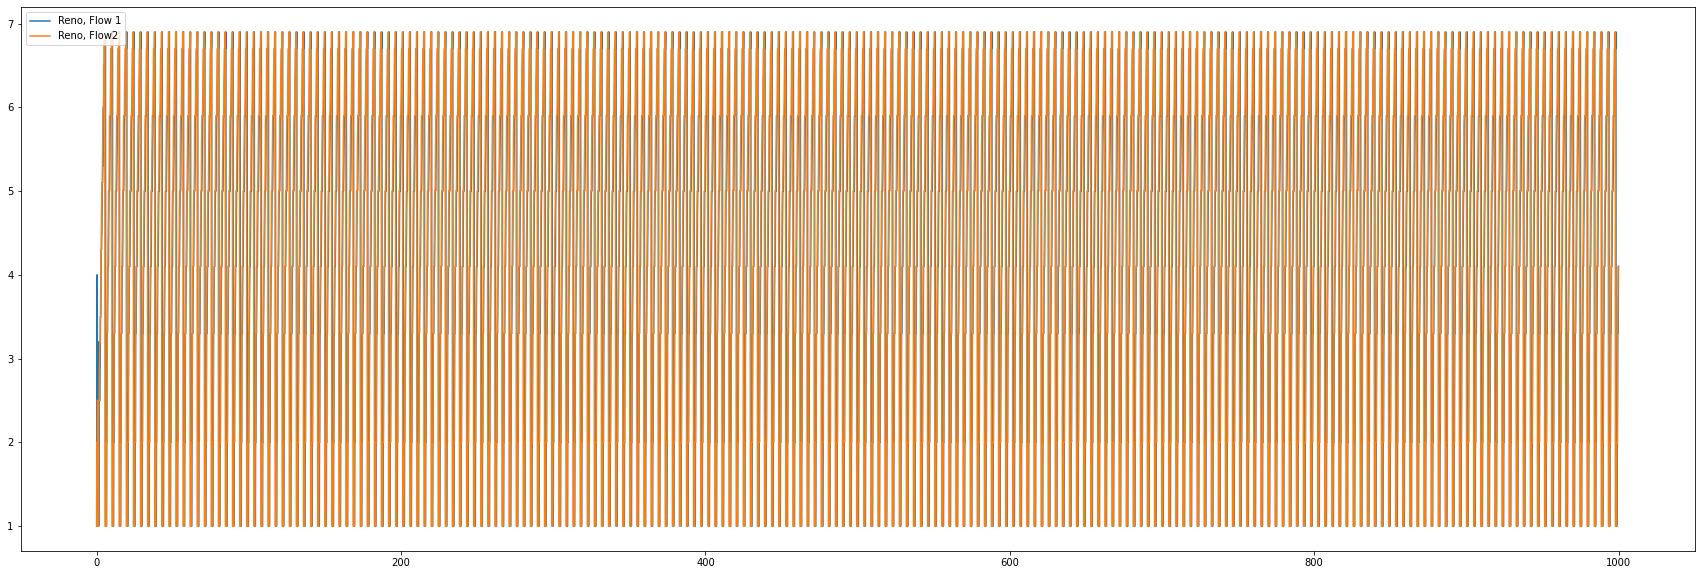

In [99]:
ns.nsopen('test.tr')

traces = []
with open('test.tr', 'r') as f:
    lines = f.readlines()
splitted = []
for line in lines:
    splitted.append(line.split(','))

splitted = np.array(splitted, dtype=np.float64)
splitted = splitted * 10
splitted = np.trunc(splitted)/10
print(splitted.shape)
times = splitted[:, 0]
cwnd1 = splitted[:, 3]
cwnd2 = splitted[:, 4]
plt.figure(figsize=(30,10))
plt.plot(times, cwnd1)
plt.plot(times, cwnd2)
plt.legend(['Reno, Flow 1', 'Reno, Flow2'], loc="upper left")
plt.show()

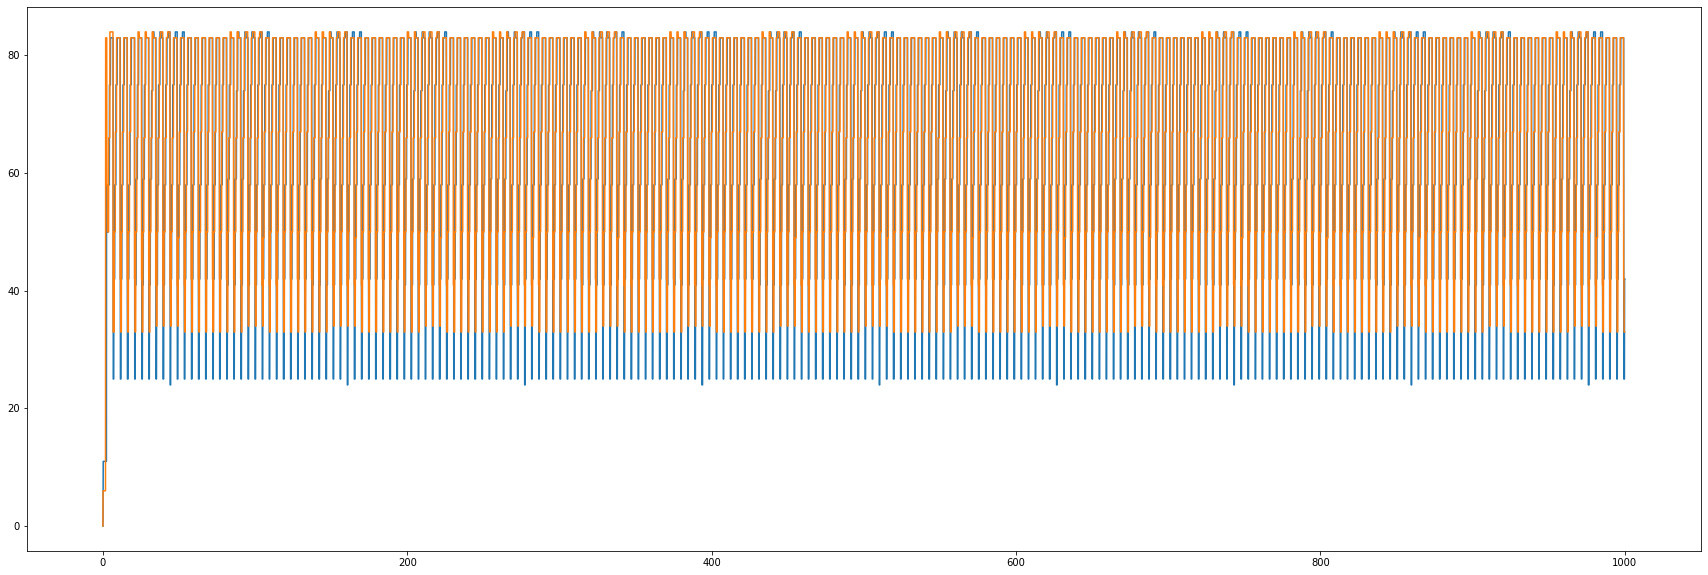

In [95]:
rtt1 = splitted[:, 5]
rtt2 = splitted[:, 6]
plt.figure(figsize=(30,10))
plt.plot(times, rtt1)
plt.plot(times, rtt2)
plt.show()

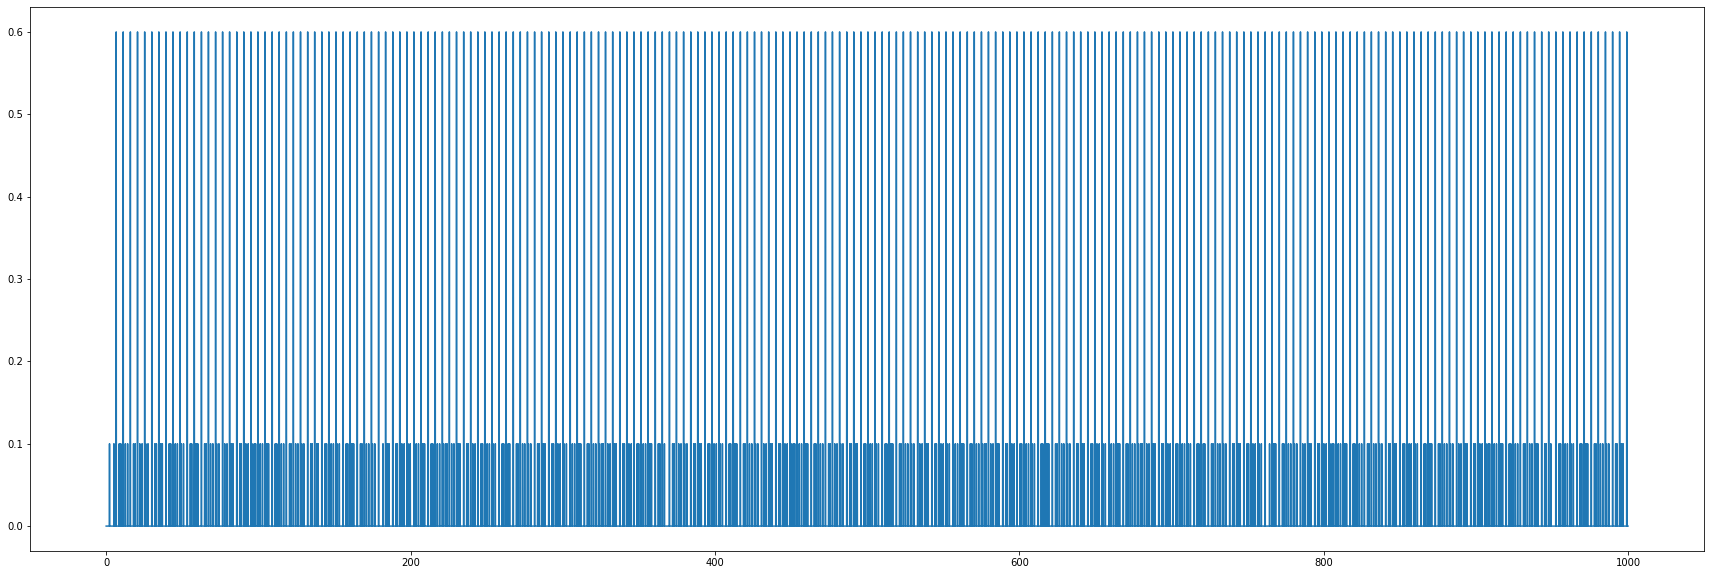

In [97]:
goodput = splitted[:, 1]
plt.figure(figsize=(30,10))
plt.plot(times, goodput)
plt.show()